## Read the Data

Import necessary libraries.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from utils.plots import *

Read the data.

In [2]:
data = None

with open('new_data/300wLP_anno_tr.json') as f:
    ignore = ['isValidation', 'img_width', 'img_height']
    
    data = pd.read_json(f)
    data = data.drop(columns=ignore)

In [3]:
data.head()

,img_paths,objpos,scale_provided,bbox,landmarks,landmarks_2d,head_pose
0,AFW/AFW_1051618982_1_0.jpg,"[227.0259552, 298.4931946]",0.911768,"[135.8491516, 215.2526703, 182.3536072, 166.48...","[[135.5419922, 243.8638153, -67.62865448], [13...","[[135.8491516, 242.7403412], [137.8736725, 266...","[-5.037350655, 0.2395197004, 1.523025155]"
1,AFW/AFW_1051618982_1_1.jpg,"[231.3812561, 299.8146362]",0.908580,"[140.5232239, 216.4512634, 181.7160645, 166.72...","[[140.4693909, 240.2672119, -73.68688965], [14...","[[140.5232239, 239.2648773], [140.6314392, 266...","[-7.089375019, 5.239519596, 2.212796926]"
2,AFW/AFW_1051618982_1_10.jpg,"[235.726532, 295.34552]",0.853296,"[150.3969269, 210.1190948, 170.6592255, 170.45...","[[204.7253418, 234.839035, -117.61026], [203.4...","[[157.4411926, 245.7213745], [150.9309692, 268...","[-7.032663822, 50.23952103, 2.25369072]"
3,AFW/AFW_1051618982_1_11.jpg,"[231.4551697, 294.9733276]",0.854604,"[145.994812, 209.8023987, 170.9207153, 170.341...","[[213.2453308, 236.2964172, -119.8408813], [21...","[[158.3337402, 246.4070435], [152.5475311, 269...","[-6.688948631, 55.23952103, 1.5502201320000002]"
4,AFW/AFW_1051618982_1_12.jpg,"[226.9594116, 294.1109924]",0.855151,"[141.4443207, 208.5832672, 171.0301666, 171.05...","[[222.3459473, 234.3593445, -119.6676025], [22...","[[160.0543671, 245.4129791], [154.4994202, 269...","[-7.17603159, 60.23952484, 2.234272718]"


In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
print(data['landmarks_2d'][0])
# Scale the data using scaler object
rs_d = np.array(data['landmarks_2d'][0]).T
scaler.fit_transform(rs_d)

[[135.8491516, 242.7403412], [137.8736725, 266.9657288], [140.4848328, 290.16070560000003], [143.2730103, 309.702301], [150.0190582, 332.0863342], [162.6520081, 349.6080017], [176.216629, 361.8892822], [194.4653625, 373.1982117], [224.0064392, 381.7337341], [251.6663666, 376.2985229], [271.0745239, 366.1178589], [285.728241, 354.2936707], [298.0898438, 336.8248291], [305.4153442, 315.4613647], [309.9833679, 295.5484009], [315.221283, 273.5827026], [318.2027588, 249.4472351], [154.6520386, 224.1594238], [165.504776, 217.1603394], [179.1708374, 215.2526703], [191.8228455, 216.8444214], [203.0553131, 220.2784576], [250.3127899, 221.3125153], [262.1092529, 217.7693481], [274.9976501, 215.8066711], [289.0296021, 218.1752625], [299.44976810000003, 226.6471558], [226.7224274, 246.720993], [226.6009216, 262.1858521], [226.3160248, 277.267334], [225.8025208, 289.8421021], [208.9736938, 296.5342102], [216.0410309, 298.9292603], [225.1957703, 301.5393066], [234.4793091, 299.42523189999997], [241.

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])

In [ ]:
data

Filtered Data

In [24]:
# Get all the elements but the last one of the split.
data['base_img_paths'] = data['img_paths'].str.split('_').str[:-1].str.join('_')

# Create the new DataFrame by grouping the 2D landmarks.
lm = data.groupby('base_img_paths').agg({
    'landmarks': lambda x: np.array(x.tolist()),
    'landmarks_2d': lambda x: np.array(x.tolist())
}).reset_index()

In [30]:
scaler = MinMaxScaler(feature_range=(-1, 1))

def scale_2d()

lm['landmarks_2d'] = lm['landmarks_2d'].apply(lambda x: scaler.fit_transform(x))
# lm['landmarks'] = lm['landmarks'].apply(lambda x: np.array(x))

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [ ]:
lm

Sub-Index Counts

In [25]:
lm['landmarks_2d'].apply(lambda x: x.shape[0]).value_counts()

landmarks_2d
18    1190
17     733
16     578
15     444
14     354
13     229
12     175
11      80
10      40
9       11
8        3
Name: count, dtype: int64

In [ ]:
# Normalise the data to the range [0, 1].



Save the data.

In [6]:
# Save the DataFrame "lm".
lm.to_json('new_data/lm_300wLP_anno_tr.json')

In [26]:
lm['base_img_paths'][1353]

'HELEN/HELEN_2378246248_1'

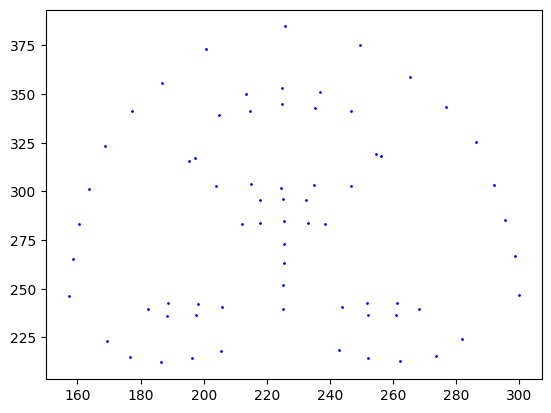

In [20]:
data_x_2d = lm['landmarks_2d'][1353][0]
plt.scatter(data_x_2d[:, 0], data_x_2d[:, 1], c='b', s=1)

## Plot 3D

In [28]:
def plot_3d(row):
    
    landmarks_3d = np.array(row.landmarks[0]).transpose()
    
    fig = plot_fig(landmarks_3d)

    # Show the interactive plot in Jupyter Notebook or in a separate browser window
    fig.show()

    #plt.scatter(landmarks_2d[0], landmarks_2d[1], c='red', s=3)
    #plt.imshow(image)
    plt.show()

In [29]:
index = 1353
row = lm.iloc[index]
plot_3d(row)